In [1]:
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
import scipy as sp
from pylab import show,hist,subplot,figure 
from numpy import linalg as nla
import matplotlib.pyplot as plt
from copy import copy, deepcopy
from matplotlib import pyplot
import matplotlib.font_manager as font_manager
from scipy.optimize import curve_fit

nCG = 10
processing trajectory  1
processing trajectory  2
processing trajectory  3
processing trajectory  4
processing trajectory  5
processing trajectory  6
processing trajectory  7
processing trajectory  8
processing trajectory  9
processing trajectory  10
processing trajectory  11
processing trajectory  12
processing trajectory  13
processing trajectory  14
processing trajectory  15
processing trajectory  16
processing trajectory  17
processing trajectory  18
processing trajectory  19
processing trajectory  20
processing trajectory  21
processing trajectory  22
processing trajectory  23
processing trajectory  24
processing trajectory  25
processing trajectory  26
processing trajectory  27
processing trajectory  28
processing trajectory  29
processing trajectory  30
processing trajectory  31
processing trajectory  32
processing trajectory  33
processing trajectory  34
processing trajectory  35
processing trajectory  36
processing trajectory  37
processing trajectory  38
processing t

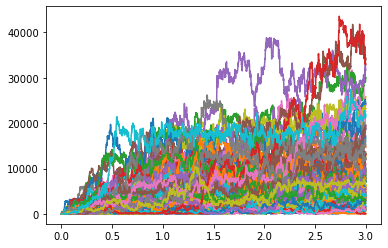

In [2]:

# this is the number of trajectories
M=100

# we assume t_Vec is the same for all runs 
str_t='./Dt_10m6_NB_1_1/t_Vec.npy'
t_Vec=np.load(str_t)
nT=np.shape(t_Vec)[0]

#to favour fitting we group different T into nT_CG values
nT_CG=3000
nCG=int(nT/nT_CG)
print('nCG =',nCG)

iT=0
avT=0
count=0
t_Vec_CG=np.array([])
while(iT<nT):
    count+=1.
    avT+=t_Vec[iT]
    if(np.mod(iT+1,nCG)==0):
        t_Vec_CG=np.append(t_Vec_CG,avT/count)
        count=0.
        avT=0.
    iT=iT+1
t_Vec_CG=t_Vec_CG-t_Vec_CG[0]
        
nT_CG=np.shape(t_Vec_CG)[0]
traj=np.zeros((M,nT_CG))
iM=1

while(iM<M+1):
    print('processing trajectory ',iM)
    str_iM=str(iM)
    str_xCM='./Dt_10m6_NB_1_'+str_iM+'/xCM_Vec.npy'
    str_yCM='./Dt_10m6_NB_1_'+str_iM+'/yCM_Vec.npy'

    xCM_Vec=np.load(str_xCM)
    yCM_Vec=np.load(str_yCM)
    
    r2CM_Vec=np.array([])
    avr2=0.
    count=0.
    iT=0
    iT_CG=0
    while(iT<nT):
        count+=1.
        avr2+=(xCM_Vec[iT]-xCM_Vec[0])**2+(yCM_Vec[iT]-yCM_Vec[0])**2
        if(np.mod(iT+1,nCG)==0):
            traj[iM-1][iT_CG]=avr2/count
            r2CM_Vec=np.append(r2CM_Vec,avr2/count)
            iT_CG+=1
            count=0.0
            avr2=0.0
        iT+=1
    plt.plot(t_Vec_CG,r2CM_Vec)
    iM=iM+1

plt.show()


In [3]:
# extract error and mean value of the trajectory

av_traj=np.array([])
err_traj=np.array([])

for i in np.arange(nT_CG):
    mean=np.mean(traj[:,i])
    var=np.var(traj[:,i])
    av_traj=np.append(av_traj,mean)
    err_traj=np.append(err_traj,np.sqrt(var/(1.*M)))

# list_t=np.arange(1,np.shape(av_traj)[0]+1)


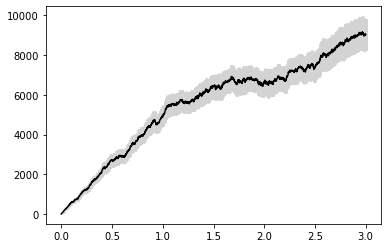

In [4]:
plt.errorbar(t_Vec_CG, av_traj, err_traj, fmt='', color='black',ecolor='lightgray', elinewidth=3, capsize=0);
plt.show()

In [5]:
# fitting 

def fit_function(x, D):
    return (x*2*D)

popt2, pcov2 = curve_fit(fit_function, t_Vec_CG ,av_traj, p0=[1000.], sigma=err_traj, absolute_sigma=True)

print(popt2, pcov2)


[1857.5440797] [[10.0109808]]


nCG = 10
processing trajectory  1
processing trajectory  2
processing trajectory  3
processing trajectory  4


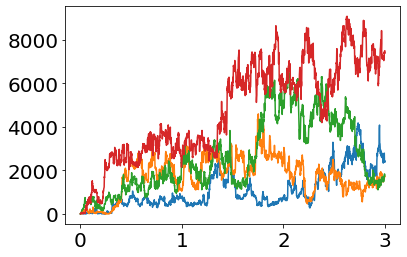

In [7]:
# this is the number of trajectories
M=4

# we assume t_Vec is the same for all runs 
str_t='./Dt_10m6_NB_1_kp_1/t_Vec.npy'
t_Vec=np.load(str_t)
nT=np.shape(t_Vec)[0]

#to favour fitting we group different T into nT_CG values
nT_CG=3000
nCG=int(nT/nT_CG)
print('nCG =',nCG)

iT=0
avT=0
count=0
t_Vec_CG=np.array([])
while(iT<nT):
    count+=1.
    avT+=t_Vec[iT]
    if(np.mod(iT+1,nCG)==0):
        t_Vec_CG=np.append(t_Vec_CG,avT/count)
        count=0.
        avT=0.
    iT=iT+1
t_Vec_CG=t_Vec_CG-t_Vec_CG[0]
        
nT_CG=np.shape(t_Vec_CG)[0]
traj=np.zeros((M,nT_CG))
iM=1

while(iM<M+1):
    print('processing trajectory ',iM)
    str_iM=str(iM)
    str_xCM='./Dt_10m6_NB_1_kp_'+str_iM+'/xCM_Vec.npy'
    str_yCM='./Dt_10m6_NB_1_kp_'+str_iM+'/yCM_Vec.npy'

    xCM_Vec=np.load(str_xCM)
    yCM_Vec=np.load(str_yCM)
    
    r2CM_Vec=np.array([])
    avr2=0.
    count=0.
    iT=0
    iT_CG=0
    while(iT<nT):
        count+=1.
        avr2+=(xCM_Vec[iT]-xCM_Vec[0])**2+(yCM_Vec[iT]-yCM_Vec[0])**2
        if(np.mod(iT+1,nCG)==0):
            traj[iM-1][iT_CG]=avr2/count
            r2CM_Vec=np.append(r2CM_Vec,avr2/count)
            iT_CG+=1
            count=0.0
            avr2=0.0
        iT+=1
    plt.plot(t_Vec_CG,r2CM_Vec)
    iM=iM+1

plt.show()


In [8]:
# extract error and mean value of the trajectory

av_traj_kp=np.array([])
err_traj_kp=np.array([])

for i in np.arange(nT_CG):
    mean=np.mean(traj[:,i])
    var=np.var(traj[:,i])
    av_traj_kp=np.append(av_traj_kp,mean)
    err_traj_kp=np.append(err_traj_kp,np.sqrt(var/(1.*M)))

# list_t=np.arange(1,np.shape(av_traj)[0]+1)

In [10]:
popt2, pcov2 = curve_fit(fit_function, t_Vec_CG ,av_traj_kp, p0=[1000.], sigma=err_traj_kp, absolute_sigma=True)

print(popt2, pcov2)

[882.6327918] [[17.54736088]]


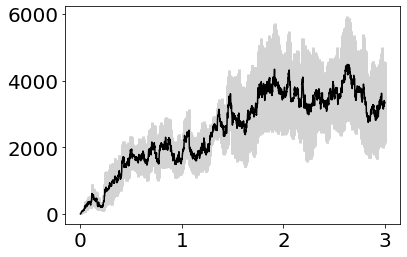

In [9]:
plt.errorbar(t_Vec_CG, av_traj_kp, err_traj_kp, fmt='', color='black',ecolor='lightgray', elinewidth=3, capsize=0);
plt.show()

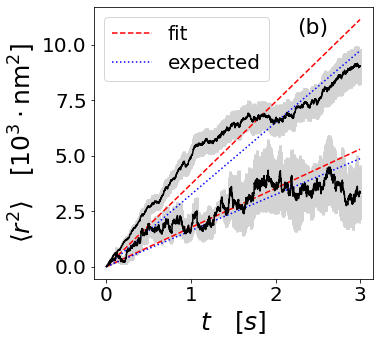

In [20]:

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel(r'$t\quad [s]$')
plt.ylabel(r'$\langle r^2\rangle \quad [10^3\cdot\mathrm{nm}^2]$')
#plt.xscale('log')
#plt.yscale('log')
plt.errorbar(t_Vec_CG, av_traj/1000, err_traj/1000, fmt='', color='black',ecolor='lightgray', elinewidth=3, capsize=0);
plt.plot(t_Vec_CG,2*1857*t_Vec_CG/1000,'r--',label='fit',color='red')
plt.plot(t_Vec_CG,2*1623*t_Vec_CG/1000,':',label='expected',color='blue')
plt.errorbar(t_Vec_CG, av_traj_kp/1000, err_traj_kp/1000, fmt='', color='black',ecolor='lightgray', elinewidth=3, capsize=0);
plt.plot(t_Vec_CG,2*882.63*t_Vec_CG/1000,'r--',color='red')
plt.plot(t_Vec_CG,2*1623*t_Vec_CG/2000,':',color='blue')
plt.legend(loc=2,fontsize=20)
plt.text(2.25, 10.5, '(b)', fontsize = 22)
plt.show()

In [9]:
koff=636.6197723675814
Dexp=koff*np.pi/111**2*100*100
print(Dexp)

1623.2448664881097


In [ ]:
koff=318.3
Dexp=koff*np.pi/111**2*100*100
print(Dexp)